**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

**Read Pokémon Dataset**

In [ ]:
pokemon_data = pd.read_csv(r"C:\Users\HP ZBook\Downloads\clean_pokemon_data.csv", index_col=0)

In [ ]:
pokemon_data.head()

,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,...,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,total_points_bins,individual_points_sum
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,"(301.667, 333.333]",318
2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,"(396.667, 428.333]",405
3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,"(523.333, 555.0]",525
3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,"(618.333, 650.0]",625
4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,Unknown,0.6,...,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,"(301.667, 333.333]",309


In [ ]:
pokemon_data.columns

Index(['name', 'german_name', 'japanese_name', 'generation', 'status',
       'species', 'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2',
       'percentage_male', 'egg_cycles', 'against_normal', 'against_fire',
       'against_water', 'against_electric', 'against_grass', 'against_ice',
       'against_fight', 'against_poison', 'against_ground', 'against_flying',
       'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
       'against_dragon', 'against_dark', 'against_steel', 'against_fairy',
       'total_points_bins', 'individual_points_sum'],
      dtype='object')

In [ ]:
pokemon_data['total_points']

pokedex_number
1      318
2      405
3      525
3      625
4      309
      ... 
896    580
897    580
898    500
898    680
898    680
Name: total_points, Length: 1045, dtype: int64

In [ ]:
pokemon_data.shape

(1045, 51)

In [ ]:
# Separate the data into categorical columns
cat_cols = pokemon_data.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
cat_cols

['name',
 'german_name',
 'japanese_name',
 'status',
 'species',
 'type_1',
 'type_2',
 'ability_1',
 'ability_2',
 'ability_hidden',
 'growth_rate',
 'egg_type_1',
 'egg_type_2',
 'total_points_bins']

In [ ]:
#label_encoding
from sklearn.preprocessing import LabelEncoder
def label_encoding():
    label =  LabelEncoder()
    for cols in cat_cols:
        pokemon_data[cols] = label.fit_transform(pokemon_data[cols])

label_encoding()


In [ ]:
pokemon_data.head(10)

,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,...,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,total_points_bins,individual_points_sum
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,104,55,629,1,2,493,2,9,13,0.7,...,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,5,318
2,435,54,628,1,2,493,2,9,13,1.0,...,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,8,405
3,973,53,630,1,2,493,2,9,13,2.0,...,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,12,525
3,592,53,630,1,2,493,2,9,13,2.4,...,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,15,625
4,134,236,585,1,2,332,1,6,17,0.6,...,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,5,309
5,135,238,853,1,2,209,1,6,17,1.1,...,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,8,405
6,132,237,854,1,2,209,2,6,7,1.7,...,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5,12,534
6,558,237,854,1,2,209,2,6,2,1.7,...,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0,15,634
6,559,237,854,1,2,209,2,6,7,1.7,...,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5,15,634


In [ ]:
corr = pokemon_data.corr()

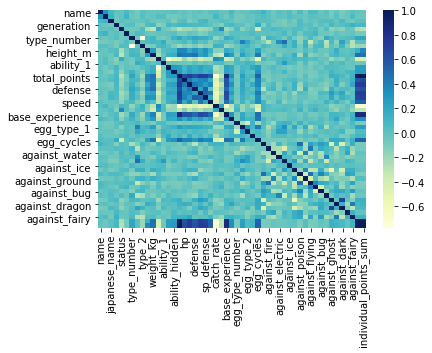

In [ ]:

sns.heatmap(corr, cmap="YlGnBu", annot=False)
 
# displaying heatmap
plt.show()

In [ ]:
points_corr = corr['total_points'].sort_values(ascending=False)

In [ ]:
points_corr

individual_points_sum    1.000000
total_points             1.000000
total_points_bins        0.966894
base_experience          0.860399
attack                   0.733028
sp_attack                0.732795
sp_defense               0.719940
hp                       0.650568
defense                  0.629656
speed                    0.561368
egg_cycles               0.541947
weight_kg                0.469901
height_m                 0.374311
growth_rate              0.337918
ability_hidden           0.273384
egg_type_1               0.250832
ability_2                0.247513
type_number              0.212363
against_ghost            0.142217
against_fairy            0.123806
against_dragon           0.119537
percentage_male          0.092549
generation               0.091050
against_dark             0.078648
egg_type_2               0.060215
against_ground           0.041568
type_1                   0.024835
japanese_name            0.016701
against_fight            0.002344
against_steel 

In [ ]:
points_df = points_corr.to_frame()

In [ ]:
points_df = points_df.reset_index()

In [ ]:
points_df.columns

Index(['index', 'total_points'], dtype='object')

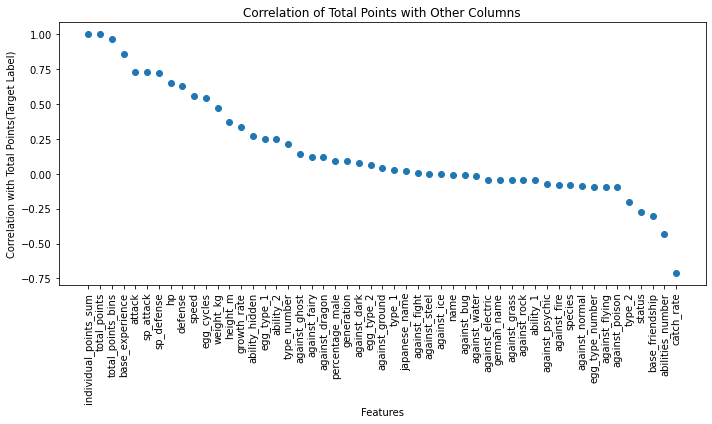

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(points_df['index'], points_df['total_points'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Total Points(Target Label)')
plt.title('Correlation of Total Points with Other Columns')
plt.tight_layout()
plt.show()

In [ ]:
points_df.set_index("index", inplace=True)

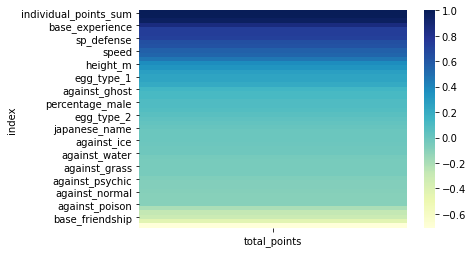

In [ ]:
sns.heatmap(points_df, cmap="YlGnBu", annot=False)
 
# displaying heatmap
plt.show()

In [ ]:
Label = pokemon_data['total_points']

In [ ]:
Features = pokemon_data.drop(['total_points'], axis=1)

### HYPOTHESIS: REGRESSION

In [ ]:
#Spliting into training and testing sets
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(Features, Label, test_size=0.2, random_state=0)

In [ ]:
scale = StandardScaler()
# Fit train labels
trainLabels = scale.fit_transform(trainLabels.to_frame())
testLabels = scale.transform(testLabels.to_frame())

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
# build model
models = [('Linear Regression', LinearRegression()), ('SGD Regression', SGDRegressor()), ('Ridge Regression', Ridge()), ('Lasso Regression', Lasso()), ('Elastic Net Regression', ElasticNet())]
# fit to the training data
# predict
for model in models:
    #Initiazing the regression model
    reg = model[1]
    reg.fit(trainFeatures, trainLabels)
    ypredictTrain = reg.predict(trainFeatures)
    ypredictTest = reg.predict(testFeatures)
    
    RMSE = np.sqrt(mean_squared_error(testLabels, ypredictTest))
    R2_score = r2_score(testLabels, ypredictTest)
    
    print(model[0])

    print(RMSE)
    print(R2_score)
    print('-'*35)

Linear Regression
3.768388252321412e-15
1.0
-----------------------------------
SGD Regression
510167458813464.8
-2.4949376878868875e+29
-----------------------------------
Ridge Regression
6.469153535191307e-07
0.9999999999995989
-----------------------------------
Lasso Regression
0.008413991565721373
0.9999321361739215
-----------------------------------
Elastic Net Regression
0.004241503593241976
0.9999827545760668
-----------------------------------


C:\Users\HP ZBook\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## EVALUATION

-Label encoding was used to convert the categorical variables
-Correlation was used to select the best features and unsuitable ones were dropped
-The dataset was split into training and testing sets with test size 20% 
-Five prediction models were trained-LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet- and their performances were evaluated with RMSE and r squared values
-Elastic net regressor was the best performing model because it had the lowest RMSE(0.004) and highest r squared(0.99..) test scores.
-The evaluated model performances are displayed above.
